# Chapter 8: Calculation of Molecular Properties

## 8.1. Calculation of Potential Energy of Neutral Molecules

Computational methods allows the calculation of potential energy of molecules. From energy calculation, many molecular properties can be derived such as electron density, dipole moment, and energy of molecular orbitals

In the following section, we will calculate the potential energies of benzene and substituted benzene compounds:

### 8.1.1. Calculation of Potential Energy

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from utils import View3DModel
import psi4
import py3Dmol
from tqdm import tqdm

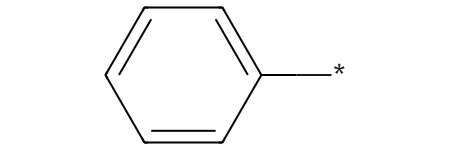

In [2]:
# Create the core molecule
core_mol = Chem.MolFromSmiles('c1ccccc1*') # Add * next to the atom you want to attach the substituents
core_mol

In [3]:
# Define substituents
substituents = ['[H]', 'F', 'Cl', 'C', 'O', 'N', 'OC', 'C(=O)', 'C(=O)O', 'C(=O)OC', 'C(=O)N(C)C', 'C#N']

[15:38:02] WARNING: not removing hydrogen atom without neighbors


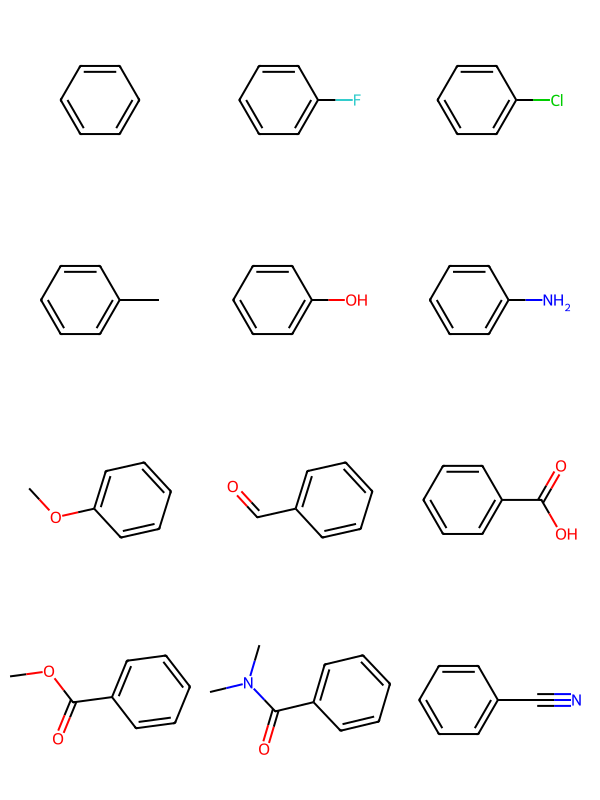

In [4]:
# Generate substituted benzenes
substituted_benzenes = []

for substituent in substituents:
    # Create a copy of the core molecule
    core_mol_copy = Chem.Mol(core_mol)

    # Replace a hydrogen atom with the substituent
    subst_mol = Chem.MolFromSmiles(substituent)
    subst_mol_smiles = Chem.MolToSmiles(Chem.rdmolops.ReplaceSubstructs(core_mol_copy, Chem.MolFromSmarts('[#0]'), subst_mol)[0])
    substituted_benzenes.append(Chem.MolFromSmiles(subst_mol_smiles))
    
Draw.MolsToGridImage(substituted_benzenes)

In [5]:
# View 3D model of a molecule
mol = substituted_benzenes[2]
View3DModel(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
# Set the number of threads and set memory limit
psi4.set_num_threads(8)
psi4.set_memory(8*1024*1024*1024) # 8 GB

8589934592

In [7]:
# Set calculation options
psi4.set_options({
    'BASIS': '6-31G*',
    'SCF_TYPE': 'DF',
    'REFERENCE': 'RHF'  # RHF for closed-shell molecules; 'UHF' or 'ROHF' for open-shell
})

In [8]:
substituted_benzenes_geometries = []
substituted_benzenes_energies = []
substituted_benzenes_wfns = []

# Optimize the geometries and calculate the energies for all molecules
progress_bar = tqdm(substituted_benzenes)
for mol in progress_bar:
    smiles = Chem.MolToSmiles(mol)
    progress_bar.set_description(f'SMILES: {smiles}. Optimizing geometry...')
    
    # Prepare the molecule
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.UFFOptimizeMolecule(mol, maxIters=200)
    
    # Write the geometry to XYZ string
    xyz_string = Chem.MolToXYZBlock(mol)

    # Get the psi4 geometry
    geometry = psi4.geometry(xyz_string)
    
    # Run geometry optimization
    max_iters = 500
    energy, wfn = psi4.optimize('b3lyp', molecule=geometry, optking__geom_maxiter=max_iters, return_wfn =True)
    substituted_benzenes_geometries.append(geometry)
    substituted_benzenes_energies.append(energy * psi4.constants.hartree2kcalmol)
    substituted_benzenes_wfns.append(wfn)

SMILES: c1ccccc1. Optimizing geometry...:   0%|                                                 | 0/12 [00:00<?, ?it/s]	Unable to completely converge to displaced geometry.
	RMS(dx):  3.024e-06 	Max(dx):  1.137e-05 	RMS(dq):  3.741e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.27e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.881e-06 	Max(dx):  1.220e-05 	RMS(dq):  6.205e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.60e-06

SMILES: Fc1ccccc1. Optimizing geometry...:   8%|███▎                                    | 1/12 [00:09<01:39,  9.07s/it]

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  2.388e-06 	Max(dx):  7.987e-06 	RMS(dq):  3.225e-05
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.20e-05

	Unable to completely converge to displaced geometry.
	RMS(dx):  7.257e-06 	Max(dx):  2.651e-05 	RMS(dq):  4.816e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.26e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.648e-06 	Max(dx):  8.621e-06 	RMS(dq):  5.705e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.86e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  4.284e-06 	Max(dx):  1.648e-05 	RMS(dq):  3.999e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.02e-06

SMILES: Clc1cccc

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  3.139e-06 	Max(dx):  9.099e-06 	RMS(dq):  1.061e-05
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.05e-05

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.801e-06 	Max(dx):  9.051e-06 	RMS(dq):  5.540e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.54e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.988e-06 	Max(dx):  1.111e-05 	RMS(dq):  4.941e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.93e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  1.803e-06 	Max(dx):  6.842e-06 	RMS(dq):  5.409e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.65e-06

SMILES: Cc1ccccc

Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.42e-04

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.10e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.48e-07

SMILES: Oc1ccccc1. Optimizing geometry...:  33%|█████████████▎                          | 4/12 [01:10<02:34, 19.28s/it]

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  5.438e-07 	Max(dx):  1.751e-06 	RMS(dq):  2.917e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 2.92e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.906e-06 	Max(dx):  1.039e-05 	RMS(dq):  4.584e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.61e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.771e-06 	Max(dx):  1.251e-05 	RMS(dq):  3.669e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.67e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  1.967e-06 	Max(dx):  7.604e-06 	RMS(dq):  4.524e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.65e-06

SMILES: Nc1ccccc

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  7.373e-07 	Max(dx):  2.285e-06 	RMS(dq):  5.604e-06
	Unable to completely converge to displaced geometry.
	RMS(dx):  3.417e-06 	Max(dx):  1.039e-05 	RMS(dq):  5.552e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.62e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  1.594e-06 	Max(dx):  6.064e-06 	RMS(dq):  4.169e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.08e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  3.125e-06 	Max(dx):  1.218e-05 	RMS(dq):  5.995e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.15e-06

SMILES: COc1ccccc1. Optimizing geometry...:  50%|███████████████████▌                   | 6/12 [01:52<02:01, 20.26s/it]

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  1.034e-05 	Max(dx):  2.874e-05 	RMS(dq):  2.052e-04
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 2.05e-04

	Unable to completely converge to displaced geometry.
	RMS(dx):  5.032e-06 	Max(dx):  1.749e-05 	RMS(dq):  1.378e-05
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.38e-05

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.461e-06 	Max(dx):  8.735e-06 	RMS(dq):  3.522e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.51e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  3.205e-06 	Max(dx):  1.494e-05 	RMS(dq):  4.334e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.05e-06

	Unable to compl

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  2.748e-06 	Max(dx):  9.631e-06 	RMS(dq):  5.109e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.82e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.328e-06 	Max(dx):  7.634e-06 	RMS(dq):  3.678e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.44e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.462e-06 	Max(dx):  9.130e-06 	RMS(dq):  4.526e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.70e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  7.801e-07 	Max(dx):  3.525e-06 	RMS(dq):  9.676e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 9.68e-06

	Energy has incr

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  1.451e-07 	Max(dx):  3.970e-07 	RMS(dq):  7.743e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 7.74e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  1.482e-06 	Max(dx):  5.351e-06 	RMS(dq):  2.309e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.19e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  6.994e-07 	Max(dx):  2.251e-06 	RMS(dq):  2.614e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.13e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  1.504e-06 	Max(dx):  5.642e-06 	RMS(dq):  4.452e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.54e-06

	Unable to compl

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  3.918e-07 	Max(dx):  1.099e-06 	RMS(dq):  6.291e-05
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 6.29e-05

	Unable to completely converge to displaced geometry.
	RMS(dx):  4.828e-06 	Max(dx):  1.565e-05 	RMS(dq):  1.955e-05
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.95e-05

	Unable to completely converge to displaced geometry.
	RMS(dx):  3.145e-06 	Max(dx):  1.158e-05 	RMS(dq):  5.014e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.61e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  5.019e-06 	Max(dx):  2.234e-05 	RMS(dq):  5.451e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.43e-06

	Unable to compl

Optimizer: Optimization complete!


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.90e-04

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.71e-03

	Energy has increased in a minimization.
	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to 2.500e-01.
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 2.40e-04

	Change in internal coordinate of 5.34e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 3.
	Change in internal coordinate of 5.62e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 5.96e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in internal coordinate of 6.10e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 4.
	Change in internal coordinate of 6.48e-01 exceeds limit of 5

Optimizer: Optimization complete!


	Unable to completely converge to displaced geometry.
	RMS(dx):  1.308e-06 	Max(dx):  4.376e-06 	RMS(dq):  3.926e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.18e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  3.368e-06 	Max(dx):  1.262e-05 	RMS(dq):  4.188e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.02e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  2.661e-06 	Max(dx):  8.119e-06 	RMS(dq):  5.269e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.86e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  6.231e-06 	Max(dx):  1.993e-05 	RMS(dq):  5.923e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.83e-06

SMILES: N#Cc1ccc

Optimizer: Optimization complete!


Text(0, 0.5, 'Potential energy (kcal/mol)')

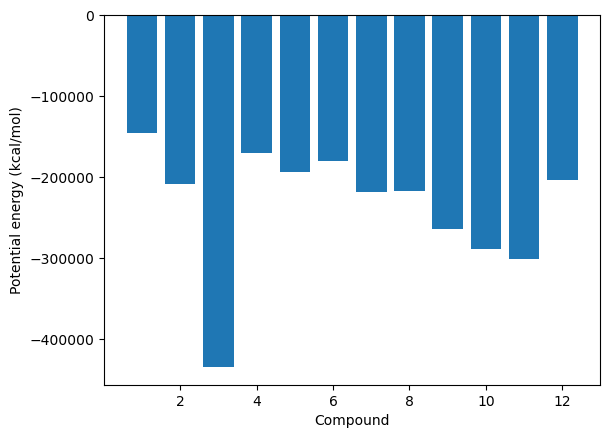

In [9]:
plt.bar(range(1, len(substituted_benzenes_energies) + 1), 
        substituted_benzenes_energies)
plt.xlabel('Compound')
plt.ylabel('Potential energy (kcal/mol)')

### 8.1.2. Effect of Solvents

In the following section, we will calculate the potential energies of toluene in a solvent and derive the solvation energy using polarizable continuum model (PCM). For more details about PCM, see [documentation](https://pcmsolver.readthedocs.io/en/latest/users/input.html#medium-section-keywords).

In [10]:
# Get the optimized geometry of toluene
toluene_idx = 3
toluene_geometry = substituted_benzenes_geometries[toluene_idx]

In [11]:
# Set up PCM solver
pcm_string = """
    Units = Angstrom
    Medium {
        SolverType = IEFPCM
        Solvent = Water
    }
    Cavity {
       RadiiSet = UFF
       Type = GePol
       Scaling = False
       Area = 0.3
       Mode = Implicit
    }
"""

psi4.pcm_helper(pcm_string)
psi4.set_options({'pcm': True, 'pcm_scf_type': 'total'})

In [12]:
# Calculate potential energy
toluene_energy_solvent = psi4.energy('b3lyp', molecule=toluene_geometry)
toluene_energy_solvent *= psi4.constants.hartree2kcalmol

print(f'Energy of toluene in solvent (PCM):  {toluene_energy_solvent:.2f} kcal/mol')
print(f'Solvation energy: {(toluene_energy_solvent - substituted_benzenes_energies[toluene_idx]):.2f} kcal/mol')

Energy of toluene in solvent (PCM):  -170412.79 kcal/mol
Solvation energy: -2.16 kcal/mol


### 8.1.3. Visualization of Dipole Moment

From the wavefunction, we can get the dipole movement of the molecule

In [13]:
# For example, get the dipole moment of chlorobenzene (index = 2)
mol_idx = 2
mol = substituted_benzenes[mol_idx]
dipole_moment = substituted_benzenes_wfns[mol_idx].variable("CURRENT DIPOLE")

print(f"Dipole moment (Debye): {dipole_moment}")

dipole_magnitude = np.linalg.norm(dipole_moment)
print(f"Dipole moment magnitude (Debye): {dipole_magnitude}")

# Visualize the molecule
view = py3Dmol.view(width=800, height=400)
view.addModel(Chem.MolToMolBlock(mol), "molecule", {'keepH': True})
view.setBackgroundColor('white')
view.setStyle({'stick': {'scale': 0.3}, 'sphere': {'scale': 0.3}})

# Scale the dipole for visualization purposes
scale_factor = 5
dipole_end_point = [d * scale_factor for d in dipole_moment] 

# Visualize dipole moment
view.addArrow({
    'start': {'x': 0, 'y': 0, 'z': 0},  # Starting at the origin
    'end': {'x': dipole_end_point[0], 'y': dipole_end_point[1], 'z': dipole_end_point[2]},
    'radius': 0.1,
    'fromCap': 1,
    'toCap': 1,
    'color': 'blue'
})

view.zoomTo()
view.show()

Dipole moment (Debye): [-0.74821546  0.02985362 -0.12684315]
Dipole moment magnitude (Debye): 0.7594779755783302


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

You can see that the dipole moment point from positive charge to the negative charge, which is opposite of what we learned in organic chemistry. This is because the direction of a dipole moment vector in molecular simulations is conventionally taken from the positive to the negative center of charge.

### 8.1.4. Visualization of Electron Density

After the energy calculation, you'll have the electron density data available. Psi4 can export this data in a format that can be visualized, such as a cube file.

In [14]:
# Set options for cube file generation
psi4.set_options({'CUBEPROP_TASKS': ['DENSITY'],
                  'CUBIC_GRID_SPACING': [0.1, 0.1, 0.1],
                  'CUBEPROP_FILEPATH': '.\\'})

# Generate the cube file
psi4.cubeprop(substituted_benzenes_wfns[mol_idx])

The cube files generated by Psi4 with the names "Da", "Db", "Dt", and "Ds" represent different types of electron densities. Here's what each one typically stands for:

- **Da (Alpha Electron Density):** This file represents the density of alpha electrons (spin-up electrons) in your molecule.

- **Db (Beta Electron Density):** This file contains the density of beta electrons (spin-down electrons). In molecules without unpaired electrons (closed-shell systems), this will be the same as the alpha electron density.

- **Dt (Total Electron Density):** This file represents the total electron density, which is the sum of the alpha and beta electron densities. For most general purposes, especially in closed-shell systems like a water molecule, this is the file you would use to visualize the overall electron density.

- **Ds (Spin Density):** This file shows the spin density, which is the difference between the alpha and beta electron densities. It's useful for visualizing unpaired electrons in open-shell systems. For a molecule like water, which is a closed-shell molecule, the spin density would typically be near zero.

For visualizing the total electron density of a molecule, you would most likely be interested in the Dt (Total Electron Density) file.

These cube files can be visualized with software such as VMD or PyMol. You can also used cube file viewer extension to view the cube files inside the working directory.

jupyterlab-cube is a JupyterLab renderer for cube files. To install jupyterlab-cube, run the following commands:

In [ ]:
!pip install jupyterlab-cube

### 8.1.5. Visualization of Electrostatic Potential Surface

After the energy calculation, cube file for electrostatic potential of the molecule can also be generated. Note that it will generate a new cube file named Dt.cube, which may may override the cube file for total electron density.  

In [15]:
# Set options for cube file generation
psi4.set_options({'CUBEPROP_TASKS': ['esp'],
                  'CUBIC_GRID_SPACING': [0.1, 0.1, 0.1],
                  'CUBEPROP_FILEPATH': '.\\'})

# Generate the cube file
psi4.cubeprop(substituted_benzenes_wfns[mol_idx])